In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')

In [5]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


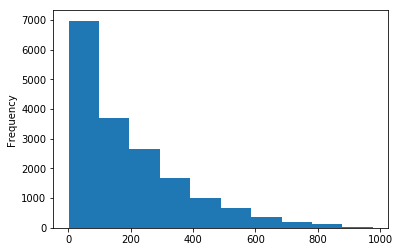

In [7]:
bike_rentals['cnt'].plot(kind='hist')

In [9]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [11]:
abs(bike_rentals.corr()['cnt']).sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

In [18]:
def assign_label(hour):
    if hour < 7:
        return 4
    elif hour < 13:
        return 1
    elif hour < 19:
        return 2
    else:
        return 3

In [21]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


In [24]:
from sklearn.metrics import mean_squared_error

In [27]:
train = bike_rentals.sample(frac=0.8)

In [33]:
train.sort_index()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,4
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,4
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,1
10,11,2011-01-01,1,0,1,10,0,6,0,1,0.38,0.3939,0.76,0.2537,12,24,36,1
12,13,2011-01-01,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,29,55,84,1
14,15,2011-01-01,1,0,1,14,0,6,0,2,0.46,0.4545,0.72,0.2836,35,71,106,2
15,16,2011-01-01,1,0,1,15,0,6,0,2,0.44,0.4394,0.77,0.2985,40,70,110,2


In [36]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]
test

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,4
11,12,2011-01-01,1,0,1,11,0,6,0,1,0.36,0.3333,0.81,0.2836,26,30,56,1
13,14,2011-01-01,1,0,1,13,0,6,0,2,0.46,0.4545,0.72,0.2985,47,47,94,2
17,18,2011-01-01,1,0,1,17,0,6,0,2,0.44,0.4394,0.82,0.2836,15,52,67,2
29,30,2011-01-02,1,0,1,6,0,0,0,3,0.42,0.4242,0.77,0.2985,0,2,2,4
43,44,2011-01-02,1,0,1,20,0,0,0,1,0.30,0.2727,0.39,0.3582,5,17,22,3
45,46,2011-01-02,1,0,1,22,0,0,0,1,0.24,0.2121,0.44,0.2985,0,9,9,3


In [40]:
features = train.columns
features = features.drop(['cnt','casual','dteday','registered','instant'])
features

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label'],
      dtype='object')

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()
lr.fit(bike_rentals[features],bike_rentals['cnt'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
predictions = lr.predict(test[features])

In [46]:
mse = mean_squared_error(test['cnt'],predictions)
rmse = mse**(1/2)
rmse

127.40432827107729

RMSE for Linear Regression: 127.4

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
clf = DecisionTreeRegressor()
clf.fit(train[features],train['cnt'])
predictions = clf.predict(test[features])
mse = mean_squared_error(test['cnt'],predictions)
rmse = mse**(1/2)
rmse

57.59901291548098

In [53]:
rmses = []
for i in range(1,20):
    clf = DecisionTreeRegressor(min_samples_leaf=i)
    clf.fit(train[features],train['cnt'])
    predictions = clf.predict(test[features])
    mse = mean_squared_error(test['cnt'],predictions)
    rmse = mse**(1/2)
    rmses.append(rmse)
    
rmses

[58.77408792969721,
 55.004310649995354,
 53.16158469151797,
 53.46274406721109,
 52.5239870124006,
 53.17266806189599,
 53.7463439572819,
 54.204388409578435,
 53.425474797412065,
 53.62567943315868,
 53.374554886276385,
 53.59908644782924,
 54.189609708920386,
 54.247026109946106,
 55.245239563332326,
 55.641996741084256,
 55.96436338885283,
 56.419555095068255,
 57.036577380152266]

Best results for `min_samples_leaf = 5`

In [75]:
parameters = []
rmses = []
for i in range(1,20):
    clf = DecisionTreeRegressor(max_depth=i,min_samples_leaf=5)
    clf.fit(train[features],train['cnt'])
    predictions = clf.predict(test[features])
    mse = mean_squared_error(test['cnt'],predictions)
    rmse = mse**(1/2)
    rmses.append(rmse)

print(min(rmses))
print(rmses.index(min(rmses)))

52.48444715690224
17


In [81]:
clf = DecisionTreeRegressor(min_samples_leaf=5)
clf.fit(train[features],train['cnt'])
predictions = clf.predict(test[features])
mse = mean_squared_error(test['cnt'],predictions)
rmse = mse**(1/2)

print(rmse)


52.536788057565545


Not a substancial difference changing the `max_depth`

Experimenting with `RandomForestRegressor`

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
clf = RandomForestRegressor()
clf.fit(train[features],train['cnt'])
predictions = clf.predict(test[features])
mse = mean_squared_error(test['cnt'],predictions)
rmse = mse**(1/2)
rmse

43.942582182504864

Experimenting tuning the parameters

([<matplotlib.axis.XTick at 0x1c06af41940>,
 <a list of 24 Text xticklabel objects>)

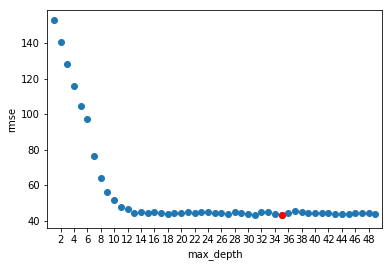

In [119]:
rmses = []
for i in range(1,50):
    clf = RandomForestRegressor(max_depth=i)
    clf.fit(train[features],train['cnt'])
    predictions = clf.predict(test[features])
    mse = mean_squared_error(test['cnt'],predictions)
    rmse = mse**(1/2)
    rmses.append(rmse)
    
plt.scatter(x = range(1,len(rmses)+1),y = rmses)
plt.scatter(x = rmses.index(min(rmses))+1,y = min(rmses),c='r')
plt.xlabel('max_depth')
plt.ylabel('rmse')
plt.xlim((0,len(rmses)+1))
plt.xticks(range(2,len(rmses)+1,2))

No need to go beyond `max_depth > 13`

([<matplotlib.axis.XTick at 0x1c069d1dd30>,
 <a list of 24 Text xticklabel objects>)

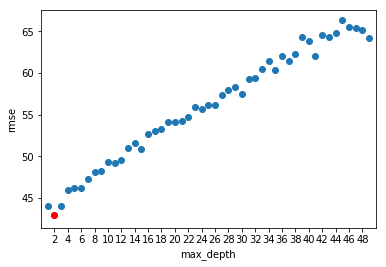

In [120]:
rmses = []
for i in range(1,50):
    clf = RandomForestRegressor(min_samples_leaf=i)
    clf.fit(train[features],train['cnt'])
    predictions = clf.predict(test[features])
    mse = mean_squared_error(test['cnt'],predictions)
    rmse = mse**(1/2)
    rmses.append(rmse)
    
plt.scatter(x = range(1,len(rmses)+1),y = rmses)
plt.scatter(x = rmses.index(min(rmses))+1,y = min(rmses),c='r')
plt.xlabel('max_depth')
plt.ylabel('rmse')
plt.xlim((0,len(rmses)+1))
plt.xticks(range(2,len(rmses)+1,2))

`max_depth` should be kept low